In [1]:

from collections import Counter
import re
import string
from random import shuffle

from subprocess import call
from IPython.display import Image

!pip install xlrd
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import spacy
from scipy import stats

!pip install textblob
from textblob import TextBlob

!pip install textstat
import textstat

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

from scipy import stats

!python -m spacy download en
import spacy

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
!pip install yellowbrick
from yellowbrick.classifier import ClassificationReport

!pip install empath
from empath import Empath

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
Regular_Comments=pd.read_csv("regular_comments.csv", error_bad_lines=False)

b'Skipping line 4581: expected 20 fields, saw 22\nSkipping line 9684: expected 20 fields, saw 21\nSkipping line 11215: expected 20 fields, saw 27\n'
b'Skipping line 33342: expected 20 fields, saw 21\nSkipping line 38620: expected 20 fields, saw 22\nSkipping line 40411: expected 20 fields, saw 21\n'
d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Russians_Bots=pd.read_csv("russian_comments.csv")

In [4]:
Regular_Comments=Regular_Comments[["body",'controversiality','created_utc',"subreddit","score"]]

In [5]:
Russian_Bots=Russians_Bots[["body","controversiality","created_utc","subreddit.display_name_prefixed","score"]]

In [6]:
Regular_Comments.head()

,body,controversiality,created_utc,subreddit,score
0,"I guess there was some awkwardness, but it was...",0.0,1.423069e+09,AskReddit,1.0
1,"Food schmooze isn't bad, I've gotten a few int...",0.0,1.424737e+09,Connecticut,1.0
2,Is there a fatigue animation before sleep that...,0.0,1.423940e+09,MonsterHunter,1.0
3,"I recently saw some Shohei Inamura films, spec...",0.0,1.425002e+09,movies,2.0
4,How long did that take?,0.0,1.424486e+09,iastate,2.0


# Analiziranje subreddita

In [7]:
Regular_Comments.describe()

,controversiality,created_utc,score
count,45129.000000,4.512900e+04,45129.000000
mean,0.020585,1.459646e+09,5.960890
std,0.141993,2.265093e+07,49.337047
min,0.000000,1.420072e+09,-91.000000
25%,0.000000,1.439878e+09,1.000000
50%,0.000000,1.459968e+09,1.000000
75%,0.000000,1.479160e+09,3.000000
max,1.000000,1.498863e+09,4490.000000


Text(0, 0.5, 'Number of comments from that subreddit')

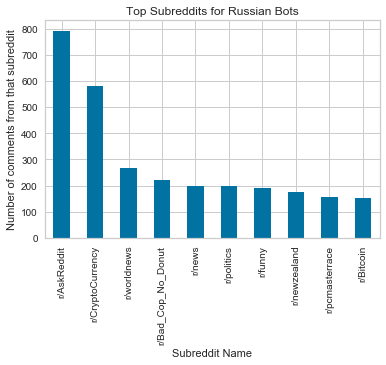

In [8]:
#Najpopularniji subredditi medju botovima
Russian_Bots.head()
ax=Russian_Bots["subreddit.display_name_prefixed"].value_counts()[:10].plot(kind="bar",title="Najpopularniji subredditi medju botovima")
ax.set_xlabel("Subreddit")
ax.set_ylabel("Broj komentara")

Text(0, 0.5, 'Broj komentara sa subreddita')

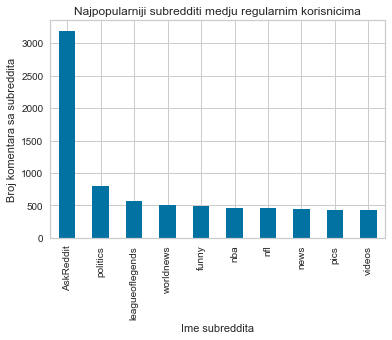

In [9]:
#Najpopularniji subredditi medju regularnim komentarima
Regular_Comments.head()
ax=Regular_Comments["subreddit"].value_counts()[:10].plot(kind="bar",title="Najpopularniji subredditi medju regularnim korisnicima")
ax.set_xlabel("Ime subreddita")
ax.set_ylabel("Broj komentara sa subreddita")

In [10]:
#Broj regularnih komentara
len(Regular_Comments.drop_duplicates())

45143

In [11]:
#Semplovanje regularnih komentara da ih bude isto koliko i ruskih bot komentara
Regular_Comments_Sample=Regular_Comments.sample(n=len(Russian_Bots),random_state=1)

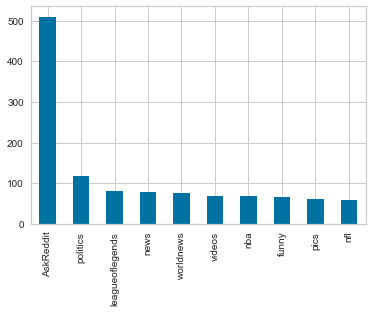

In [12]:
#Najpopularniji subredditi medju semplovanim komentarima
Regular_Comments_Sample["subreddit"].value_counts()[:10].plot(kind="bar")

In [13]:
#Koliko najpopularnijih subreddita ima na oba dataseta
Regular_Comments_Sample["subreddit"].value_counts()[:20].index.isin(Regular_Comments["subreddit"].value_counts()[:20].index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [14]:
#Dvadeset najcescih subreddita
Regular_Comments["subreddit"].value_counts()[:20].index

Index(['AskReddit', 'politics', 'leagueoflegends', 'worldnews', 'funny', 'nba',
       'nfl', 'news', 'pics', 'videos', 'pcmasterrace', 'The_Donald',
       'SquaredCircle', 'soccer', 'todayilearned', 'movies', 'hockey',
       'gaming', 'DestinyTheGame', 'DotA2'],
      dtype='object')

# Analiziranje upvote-ova

In [15]:
#Najcesci broj upvote-ova na komentarima ruskih botova
print(Russian_Bots.score.value_counts()[:10])

 1    3560
 2    1004
 0     452
 3     369
-1     186
 4     147
 5     121
-2     111
 6      91
 7      55
Name: score, dtype: int64


In [16]:
#Najcesci broj upvote-ova na komentarima regularnih korisnika
print(Regular_Comments_Sample.score.value_counts()[:10])

 1.0     2957
 2.0     1175
 3.0      594
 0.0      249
 4.0      218
 5.0      218
 6.0      153
 7.0      125
 8.0      100
-1.0       82
 9.0       71
 10.0      63
Name: score, dtype: int64


In [17]:
#Mean od upvote-ova komentara
print("Mean upvote-ova regularnih {}".format
     (np.mean(Regular_Comments_Sample.score)))

print("Mean botova  {}".format
     ((np.mean(Russian_Bots.score))))


Mean upvote-ova regularnih 5.585692995529061
Mean botova  17.600804649083592


In [18]:
#100 percentil upvote-ova regularnih 
print(np.percentile(Regular_Comments_Sample.score.dropna(),100))

1181.0


In [19]:
#isto za trolove
print(np.percentile(Russian_Bots.score.dropna(),100))

22872.0


In [20]:
#Pravljenje binova po upvote-ovima za regularne
bins=[-10,0,10,100,500,1000]
digitized=np.digitize(Regular_Comments_Sample.score, bins)
bin_means=[Regular_Comments_Sample.score[digitized == i].mean() for i in range(0, len(bins))]
print(bin_means) #mean upvote-ova za svaki bin

[-22.3, -3.146551724137931, 2.096075085324232, 25.269372693726936, 195.89743589743588, 679.8333333333334]


d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Broj komentara'),
 Text(0.5, 0, 'bin'),
 Text(0.5, 1.0, 'Distribucija upvote-ova regularnih')]

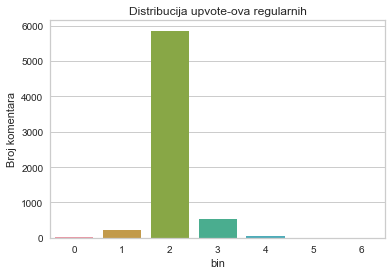

In [21]:
#Vizualizacija distribucije za binove
ax=sns.countplot(digitized)
ax.set(xlabel='bin', ylabel='Broj komentara',title="Distribucija upvote-ova regularnih")

In [22]:
#Binovi za botove
bins = [-10,0,10,100,500,1000]
digitized = np.digitize(Russian_Bots.score, bins)
bin_means = [Russian_Bots.score[digitized == i].mean() for i in range(0, len(bins))]

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Broj komentara'),
 Text(0.5, 0, 'bin'),
 Text(0.5, 1.0, 'Distribucija upvote-ova botova')]

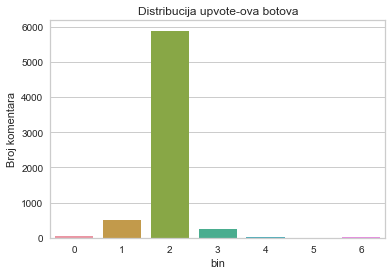

In [23]:
ax=sns.countplot(digitized)
ax.set(xlabel='bin', ylabel='Broj komentara',title="Distribucija upvote-ova botova")

# Analiziranje vremena postovanja

In [24]:
#utc u datetime
Russian_Bots["date"] = pd.to_datetime(Russian_Bots['created_utc'],unit='s')
Regular_Comments_Sample["date"] = pd.to_datetime(Regular_Comments_Sample['created_utc'],unit='s')
#warning je false-positive, ima objasnjenje na stacku zasto, nisam istrazio do kraja jer radi sve

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
#utc u datetime
Russian_Bots["Time"]=Russian_Bots["date"].dt.hour.dropna()
Regular_Comments_Sample["Time"]=Regular_Comments_Sample["date"].dt.hour.dropna()


d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'broj komentara'),
 Text(0.5, 0, 'vreme'),
 Text(0.5, 1.0, 'Distribucija vremena postovanja komentara')]

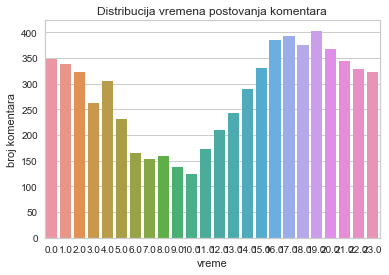

In [26]:
ax=sns.countplot(Regular_Comments_Sample.Time)
ax.set(title="Distribucija vremena postovanja komentara",xlabel="vreme",ylabel="broj komentara")

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'broj komentara'),
 Text(0.5, 0, 'vreme'),
 Text(0.5, 1.0, 'Distribucija vremena postovanja komentara za botove')]

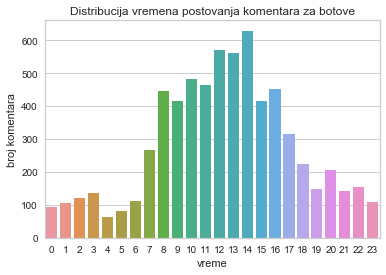

In [27]:
ax=sns.countplot(Russian_Bots.Time)
ax.set(title="Distribucija vremena postovanja komentara za botove",xlabel="vreme",ylabel="broj komentara")

In [28]:
#Da li je distribucija vremena postovanja statisticki znacajna
stats.ks_2samp(Russian_Bots.Time,  Regular_Comments_Sample.Time)

Ks_2sampResult(statistic=0.1876024437490687, pvalue=1.3238198576170733e-103)

In [29]:
#Datumi sa najvise komentara botova
Russian_Bots["date"].dt.date.value_counts()[:50]

2018-01-06    83
2018-02-02    77
2016-04-27    75
2018-01-10    74
2018-03-05    64
2015-06-07    63
2018-01-03    61
2018-03-12    61
2017-05-17    57
2018-01-22    55
2017-12-12    55
2018-01-26    55
2017-12-25    54
2016-04-07    54
2018-03-07    54
2018-01-11    54
2018-01-23    54
2016-04-08    53
2015-06-06    52
2016-08-17    47
2017-12-26    47
2018-01-20    47
2017-12-24    47
2017-12-22    44
2016-04-05    44
2016-07-27    43
2017-12-21    43
2017-12-29    42
2018-01-31    42
2016-04-23    42
2018-02-19    39
2015-09-16    39
2016-09-13    38
2016-04-06    37
2015-11-30    37
2017-12-27    36
2015-09-12    36
2018-01-30    36
2018-01-04    36
2018-01-09    35
2016-08-14    35
2015-09-17    35
2015-09-13    35
2016-04-09    35
2018-03-06    34
2016-09-07    34
2016-09-08    33
2017-12-11    33
2016-04-28    33
2018-03-13    32
Name: date, dtype: int64

In [30]:
#Datumi sa najvise komentara regularnih korisnika 
Regular_Comments_Sample["date"].dt.date.value_counts()[:20]

2016-10-23    20
2016-05-04    19
2015-07-10    17
2016-07-20    16
2017-02-03    16
2015-03-06    16
2015-03-18    15
2015-08-11    15
2015-06-09    15
2015-06-10    15
2016-12-10    15
2017-06-05    15
2015-08-13    15
2015-04-27    15
2015-04-14    15
2016-06-29    15
2016-04-21    14
2016-11-09    14
2015-05-18    14
2016-05-19    14
Name: date, dtype: int64

"Named Entities"

In [31]:
nlp = spacy.load('en_core_web_sm')
#u novom spacy mora ovako, ranije moglo samo en, zna da baguje sa starijom verzijom spacy-ja

In [32]:

#sredjivanje datasetova od praznina, spaceova...
Russian_Bots.body=Russian_Bots.body.str.replace("(\r)|(\n)","")
Regular_Comments_Sample.body=Regular_Comments_Sample.body.str.replace("(\r)|(\n)","")

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
def named_entities(x):
    """dobavljanje named entities"""
    doc=nlp(x)
    named_=[]
    for doc in doc.ents:
        if doc == None:
            return named_
        else:
            named_.append(doc)
    return named_

In [34]:
#Named entities za regularne
Regular_Comments_Sample["Named_entities"]=Regular_Comments_Sample.body.apply(func=lambda x: named_entities(x))

In [35]:
#NE za botove
Russian_Bots["Named_entities"]=Russian_Bots.body.apply(func=lambda x: named_entities(x))

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
def get_polarity(x):
  """Polarnost svakog komentara."""
  b = TextBlob(x)
  return b.sentiment.polarity

In [37]:
#Polarnost regularnih
Regular_Comments_Sample["Polarity"]=Regular_Comments_Sample.body.apply(func=lambda x: get_polarity(x))
np.mean(Regular_Comments_Sample["Polarity"])

0.0816217140364302

In [38]:
#Polarnost botova
Russian_Bots["Polarity"]=Russian_Bots.body.apply(func=lambda x: get_polarity(x))
np.mean(Russian_Bots["Polarity"])

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.11293680868512034

Flesch-Kinkaid

In [39]:
#Flesch Kincaid za botove
Russian_Bots["Flesch_Kincaid"]=Russian_Bots.body.apply(func=lambda x: textstat.flesch_kincaid_grade(x))
np.mean(Russian_Bots["Flesch_Kincaid"])

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


6.312993592609149

In [40]:
#Isto za regularne
Regular_Comments_Sample["Flesch_Kincaid"]=Regular_Comments_Sample.body.apply(func=lambda x: textstat.flesch_kincaid_grade(x))
np.mean(Regular_Comments_Sample["Flesch_Kincaid"])

10.82019073163463

# Analiziranje broja kontroverznih komentara

In [41]:
#Broj kontroverznih bot komentara
Russian_Bots.controversiality.value_counts()

0    6466
1     245
Name: controversiality, dtype: int64

In [42]:
#Broj kontroverznih regularnih
Regular_Comments_Sample.controversiality.value_counts()

0.0    6577
1.0     133
Name: controversiality, dtype: int64

# Leksika

In [43]:
lexicon = Empath()

In [44]:
#5 leksickih kategorija najcesce vezanih za ruske komentare, izvor ideje je naucni rad : 
lexicon.create_category("russia",["russia","putin","moscow","kremlin","KGB","ukraine","russian"],model="reddit")
lexicon.create_category("social_media",["fake_news","twitter_bot","social_media"],model="reddit")
lexicon.create_category("trump",["donald_trump","POTUS","michael_flynn","russian_collusion","mueller_investigation","putin"],model="reddit")
lexicon.create_category("FBI",["FBI","investigation","robert","comey","flynn"],model="reddit")
lexicon.create_category("hilary",["DNC","emails","bernie"],model="reddit")

["russia", "ukraine", "russia", "crimea", "kiev", "russians", "kremlin", "ukrainians", "seperatists", "moscow", "poroshenko", "eastern_ukraine", "Ukraine", "iran", "Kiev", "maidan", "iran", "Donbass", "Kremlin", "Putin", "Ukrain", "north_korea", "Ukraine", "ukraine", "iraq", "iraq", "separatist", "Kremlin", "russian_army", "Ukrainian_government", "East_Ukraine", "putin", "yemen", "chechnya", "Eastern_Ukraine", "russian", "separatists", "Russia", "Poroshenko", "ukrainian", "syria", "ukranians", "Donbass", "Russian_invasion", "Poroshenko", "donbass", "baltics", "Putin", "russian_invasion", "russian_troops", "east_Ukraine", "syria", "NK", "Ukraine", "Poroshenko", "Maidan", "Ukraine_government", "libya", "soviet", "Donbass", "poland", "russian_people", "Donbas", "rebels", "russians", "ussr", "assad", "Russian_army", "Russians", "Crimea", "Eastern_Ukraine", "Ukraine", "soviets", "ukranian", "russian_soldiers", "chechens", "Ukrainians", "eastern_Ukraine", "belarus", "moldova", "NATO", "Chech

In [45]:
def Lexical_Score(x):
    """Dodeljivanje leksickog score-a svakom komentaru u odnosu na kontekst recenice"""
    c=0
    analyze=lexicon.analyze(x,categories=['russia,social_media',"trump","FBI","hilary"],normalize=True)
    attrs=[w for k,w in analyze.items() if w >0]
    if len(attrs)>0:
        for attr in attrs:
            c+=attr
    return c

In [46]:
Russian_Bots["Lexical_Score"]=Russian_Bots.body.apply(func=lambda x:Lexical_Score(x))

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
Regular_Comments_Sample["Lexical_Score"]=Regular_Comments_Sample.body.apply(func=lambda x:Lexical_Score(x))

# Dodavanje jos nekih osnovnih feature vezanih za broj reci odnosno recenice

In [48]:
#broj reci
Russian_Bots['word_count']=Russian_Bots['body'].apply(lambda x: len(x.split()))
Regular_Comments_Sample['word_count']=Regular_Comments_Sample['body'].apply(lambda x: len(x.split()))

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
#Znakovi interpunkcije
Russian_Bots['punctuation_count']=Russian_Bots['body'].apply(lambda x: len("".join(punc for punc in x if punc in string.punctuation))) 
Regular_Comments_Sample['punctuation_count']=Regular_Comments_Sample['body'].apply(lambda x: len("".join(punc for punc in x if punc in string.punctuation))) 

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
#Pocetna velika slova
Russian_Bots['upper_case_word_count'] = Russian_Bots.body.apply(lambda x: len([word for word in x.split() if word.isupper()]))
Regular_Comments_Sample['upper_case_word_count'] = Regular_Comments_Sample.body.apply(lambda x: len([word for word in x.split() if word.isupper()]))

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
#Izdvajanje bitnih kolona
Regular_Comments_Sample=Regular_Comments_Sample[["Time","Named_entities","Polarity",
                     "Flesch_Kincaid","Lexical_Score","word_count","punctuation_count",
                     "upper_case_word_count"]]
Russian_Bots=Russian_Bots[["Time","Named_entities","Polarity",
                     "Flesch_Kincaid","Lexical_Score","word_count","punctuation_count",
                     "upper_case_word_count"]]


In [52]:
#Dodavanje labela
Regular_Comments_Sample["Label"]=["0" for x in range(len(Regular_Comments_Sample))]
Russian_Bots["Label"]=["1" for x in range(len(Regular_Comments_Sample))]

In [53]:
#Spajanja datasetova
total=Regular_Comments_Sample.append(Russian_Bots)

In [54]:
#Ukupan broj named entities za svaki komentar
total["Named_entities"]=total.Named_entities.apply(lambda x:len(x))

#Baseline test

In [55]:
#oznacavanje bot i regularnih komentara
Russian_Bots["Troll_Status"]=["Russian" for x in range(len(Russian_Bots))]
Regular_Comments_Sample["Troll_Status"]=["Non-Russian" for x in range(len(Russian_Bots))]
appended=np.array(Regular_Comments_Sample.append(Russian_Bots)["Troll_Status"])

In [56]:
#Lista sa random oznakama da li je komentar bot ili regularan
actual=list(pd.Series(appended))
troll=["Russian" for x in range(len(Russian_Bots))]
not_troll=["Non-Russian" for x in range(len(Russian_Bots))]
combined=troll+not_troll

In [57]:

shuffle(combined)
shuffle(appended)

In [58]:
#Accuracy, logicno je da je oko 50% posto je random
x=0
for label in range(len(actual)):
    if actual[label]==combined[label]:
        x+=1
print(x/len(combined)*100)

50.081954999254954


In [59]:
#Random predikcije proveravanje rezultata
actual_converted=[]
test=[]
for label in actual:
  if label=="Non-Russian":
    actual_converted.append(0)
  else:
    actual_converted.append(1)
for label in combined:
  if label=="Non-Russian":
    test.append(0)

  else:
    test.append(1)

In [60]:
# Recall
metrics.recall_score(actual_converted,test)

0.5008195499925495

In [61]:
# AUC
metrics.roc_auc_score(actual_converted,test)

0.5008195499925496

# Random Forest

In [62]:
#novi index
total.index=list(range(len(total)))


In [63]:
#Random mesanje redova
shuffled_rows=total.reindex(np.random.permutation(total.index))

In [64]:
#Izbacivanje N/A redova
shuffled_rows.dropna(inplace=True)

In [65]:

X=shuffled_rows.iloc[:,:-1]#nezavisne promenljive
y=shuffled_rows.iloc[:,-1]#vrednosti koje se prediktuju

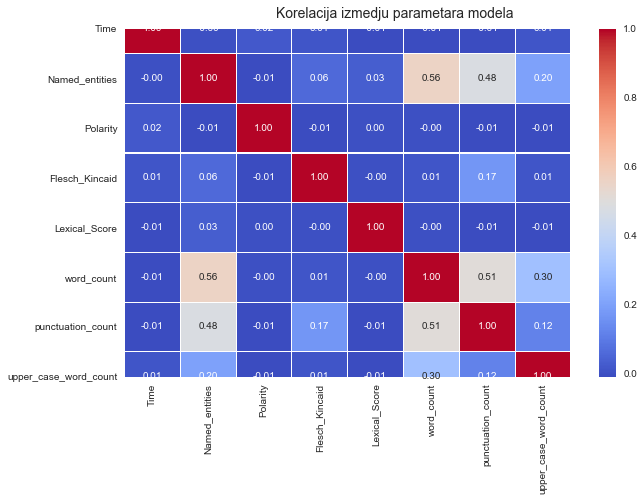

In [66]:
f, ax = plt.subplots(figsize=(10, 6))
corr = X.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Korelacija izmedju parametara modela', fontsize=14)

In [67]:
#Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [68]:
#Standardizovanje podataka
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [69]:
#Random Forest algoritam za klasifikovanje
Classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
Classifier.fit(X_train, y_train)  
y_pred = Classifier.predict(X_test) 

In [70]:
y_pred=y_pred.astype(int)
y_test_int=y_test.astype(int)

In [71]:
# Recall
metrics.recall_score(y_test_int,y_pred)

0.6889055472263869

In [72]:
#auc
metrics.roc_auc_score(y_test_int,y_pred)

0.6812403383800328

d:\ftn\4 godina\7 semestar\soft kompjuting\vezbe\sc-2020-siit-main\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


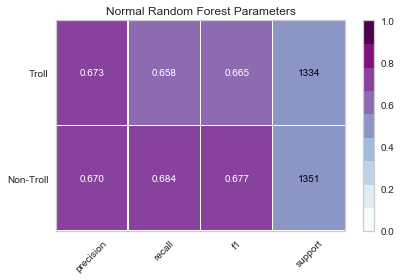

In [73]:
visualizer = ClassificationReport(RandomForestClassifier() ,cmap='BuPu',title="Normal Random Forest Parameters",classes=["Non-Troll","Troll"], support=True)
visualizer.fit(X_train, y_train)  # Fitovanje vizualizatora i modela
visualizer.score(X_test, y_test)  # Evaluacija modela na test podacima
g = visualizer.poof()             # vizualizovanje podataka